Ans1. We need to perform n*m*k multiplications and n*m*(k-1) additions
      It is because when we follow the algorithm for mateix multiplication we have to first multiply first rom of matrix one with first coloumn of matrix two to get first element of resultant matrix and in the process we get the above results

A2

In [1]:
import time
import random
import numpy as np


n, k, m = 10, 20, 15




A_list = [[random.random() for _ in range(k)] for _ in range(n)]
B_list = [[random.random() for _ in range(m)] for _ in range(k)]


A_np = np.array(A_list)
B_np = np.array(B_list)



def matrix_normal(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    result = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += A[i][l] * B[l][j]
    return result

# Time pure Python multiplication
start_list = time.time()
C_list = matrix_normal(A_list, B_list)
end_list = time.time()
time_list = end_list - start_list



start_np = time.time()
C_np = np.dot(A_np, B_np)
end_np = time.time()
time_np = end_np - start_np



print(f"Time taken with list of lists: {time_list:.4f} seconds")
print(f"Time taken with NumPy: {time_np:.4f} seconds")




Time taken with list of lists: 0.0004 seconds
Time taken with NumPy: 0.0036 seconds


A3. Using the first method we have time complexity of O(n^2) as for one iteration time complexity is O(n) and we have to iterate n//2 times to get to the median so time complexity becomes O(n^2).

Alternatly we can use quicksort method to do it as it has time complexity of O(n log(n)).

In [8]:
#Using quicksort method
import numpy
import random
import time
def find_median_quicksort(arr):
    arr_sorted=sorted(arr)
    n = len(arr)
    if n % 2 == 1:
        return arr_sorted[n // 2]
    else:
        return (arr_sorted[n//2 -1]+arr_sorted[n//2])/2

def find_median_normal_method(arr):
  arr2=arr[:]
  for i in range(len(arr)//2):
    large=max(arr2)
    arr2.remove(large)
  return max(arr2)

arr=[random.randint(1,10000) for _ in range(10000)]
arr_np=np.array(arr)

start = time.time()
median_naive = find_median_normal_method(arr)
end = time.time()
print(f"Naive Median: {median_naive}, Time: {end - start:.4f}s")

# Sorted O(n log n)
start = time.time()
median_sort = find_median_quicksort(arr)
end = time.time()
print(f"Sorted Median: {median_sort}, Time: {end - start:.4f}s")

# NumPy Median
start = time.time()
median_numpy = np.median(arr_np)
end = time.time()
print(f"NumPy Median: {median_numpy}, Time: {end - start:.4f}s")

Naive Median: 5011, Time: 0.7887s
Sorted Median: 5011.5, Time: 0.0018s
NumPy Median: 5011.5, Time: 0.0007s


A4. Gradient with respect to x= 2xy + y^3 cosx
    Gradient with respect to y= x^2 + 3y^2 sinx

A5.

In [12]:
import jax.numpy as jnp
from jax import grad
import numpy as np


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = grad(f, argnums=(0, 1))


def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy


np.random.seed(0)
for _ in range(5):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)

    grad_auto = grad_f(x, y)
    grad_manual = analytical_grad(x, y)

    print(f"x = {x:.3f}, y = {y:.3f}")
    print(f"JAX grad:      df/dx = {grad_auto[0]:.6f}, df/dy = {grad_auto[1]:.6f}")
    print(f"Manual grad:   df/dx = {grad_manual[0]:.6f}, df/dy = {grad_manual[1]:.6f}")
    print(f"Match?         {'Yes' if jnp.allclose(jnp.array(grad_auto), jnp.array(grad_manual))else 'No'}\n")


x = 0.488, y = 2.152
JAX grad:      df/dx = 10.901705, df/dy = 6.753312
Manual grad:   df/dx = 10.901706, df/dy = 6.753312
Match?         Yes

x = 1.028, y = 0.449
JAX grad:      df/dx = 0.969201, df/dy = 1.573402
Manual grad:   df/dx = 0.969201, df/dy = 1.573402
Match?         Yes

x = -0.763, y = 1.459
JAX grad:      df/dx = 0.015822, df/dy = -3.832219
Manual grad:   df/dx = 0.015822, df/dy = -3.832219
Match?         No

x = -0.624, y = 3.918
JAX grad:      df/dx = 43.904934, df/dy = -26.519175
Manual grad:   df/dx = 43.904930, df/dy = -26.519175
Match?         Yes

x = 4.637, y = -1.166
JAX grad:      df/dx = -10.688909, df/dy = 17.434244
Manual grad:   df/dx = -10.688909, df/dy = 17.434244
Match?         Yes



A6

In [13]:
import sympy as sp


x, y = sp.symbols('x y')


f = x**2 * y + y**3 * sp.sin(x)


df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Symbolic Gradient:")
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)


expected_df_dx = 2*x*y + y**3 * sp.cos(x)
expected_df_dy = x**2 + 3*y**2 * sp.sin(x)

assert sp.simplify(df_dx - expected_df_dx) == 0, "Mismatch in ∂f/∂x"
assert sp.simplify(df_dy - expected_df_dy) == 0, "Mismatch in ∂f/∂y"

print("\n Symbolic gradient matches manual derivation.")


Symbolic Gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

 Symbolic gradient matches manual derivation.


A7

In [ ]:
students_data = {
    "2022": {
        "Branch 1": {
            1: {
                "Name": "Alice",
                "Marks": {
                    "Maths": 95,
                    "English": 88
                }
            },
            2: {
                "Name": "Bob",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {
            3: {
                "Name": "Charlie",
                "Marks": {
                    "Maths": 76,
                    "English": 82
                }
            }
        }
    },
    "2023": {
        "Branch 1": {
            4: {
                "Name": "David",
                "Marks": {
                    "Maths": 85,
                    "English": 90
                }
            }
        },
        "Branch 2": {
            5: {
                "Name": "Eva",
                "Marks": {
                    "Maths": 91,
                    "English": 86
                }
            }
        }
    },
    "2024": {
        "Branch 1": {},
        "Branch 2": {}
    },
    "2025": {
        "Branch 1": {},
        "Branch 2": {}
    }
}


A8

In [18]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # dict: subject -> marks

    def __repr__(self):
        return f"Roll No: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # List of Student objects

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"{self.name} -> {self.students}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # List of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"{self.year}:\n" + "\n".join([f"  {branch}" for branch in self.branches])

# ------------------------------
# 🗃️ Create Database
# ------------------------------

database = []

# Add year 2022
year_2022 = Year("2022")

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Alice", {"Maths": 95, "English": 88}))
branch1_2022.add_student(Student(2, "Bob", {"Maths": 100, "English": 70}))

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "Charlie", {"Maths": 76, "English": 82}))

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)
database.append(year_2022)

# Add year 2023
year_2023 = Year("2023")

branch1_2023 = Branch("Branch 1")
branch1_2023.add_student(Student(4, "David", {"Maths": 85, "English": 90}))

branch2_2023 = Branch("Branch 2")
branch2_2023.add_student(Student(5, "Eva", {"Maths": 91, "English": 86}))

year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)
database.append(year_2023)

# Add year 2024
year_2024 = Year("2024")

branch1_2024 = Branch("Branch 1")
branch1_2024.add_student(Student(6, "Rohan", {"Maths": 78, "English": 84}))
branch1_2024.add_student(Student(7, "Priya", {"Maths": 92, "English": 89}))

branch2_2024 = Branch("Branch 2")
branch2_2024.add_student(Student(8, "Anjali", {"Maths": 88, "English": 91}))
branch2_2024.add_student(Student(9, "Amit", {"Maths": 81, "English": 76}))

year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)
database.append(year_2024)

# Add year 2025
year_2025 = Year("2025")

branch1_2025 = Branch("Branch 1")
branch1_2025.add_student(Student(10, "Sanjay", {"Maths": 94, "English": 87}))
branch1_2025.add_student(Student(11, "Meena", {"Maths": 85, "English": 90}))

branch2_2025 = Branch("Branch 2")
branch2_2025.add_student(Student(12, "Vikram", {"Maths": 79, "English": 83}))
branch2_2025.add_student(Student(13, "Kavita", {"Maths": 90, "English": 88}))

year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)
database.append(year_2025)


for year in database:
    print(year)
    print()


2022:
  Branch 1 -> [Roll No: 1, Name: Alice, Marks: {'Maths': 95, 'English': 88}, Roll No: 2, Name: Bob, Marks: {'Maths': 100, 'English': 70}]
  Branch 2 -> [Roll No: 3, Name: Charlie, Marks: {'Maths': 76, 'English': 82}]

2023:
  Branch 1 -> [Roll No: 4, Name: David, Marks: {'Maths': 85, 'English': 90}]
  Branch 2 -> [Roll No: 5, Name: Eva, Marks: {'Maths': 91, 'English': 86}]

2024:
  Branch 1 -> [Roll No: 6, Name: Rohan, Marks: {'Maths': 78, 'English': 84}, Roll No: 7, Name: Priya, Marks: {'Maths': 92, 'English': 89}]
  Branch 2 -> [Roll No: 8, Name: Anjali, Marks: {'Maths': 88, 'English': 91}, Roll No: 9, Name: Amit, Marks: {'Maths': 81, 'English': 76}]

2025:
  Branch 1 -> [Roll No: 10, Name: Sanjay, Marks: {'Maths': 94, 'English': 87}, Roll No: 11, Name: Meena, Marks: {'Maths': 85, 'English': 90}]
  Branch 2 -> [Roll No: 12, Name: Vikram, Marks: {'Maths': 79, 'English': 83}, Roll No: 13, Name: Kavita, Marks: {'Maths': 90, 'English': 88}]



A9

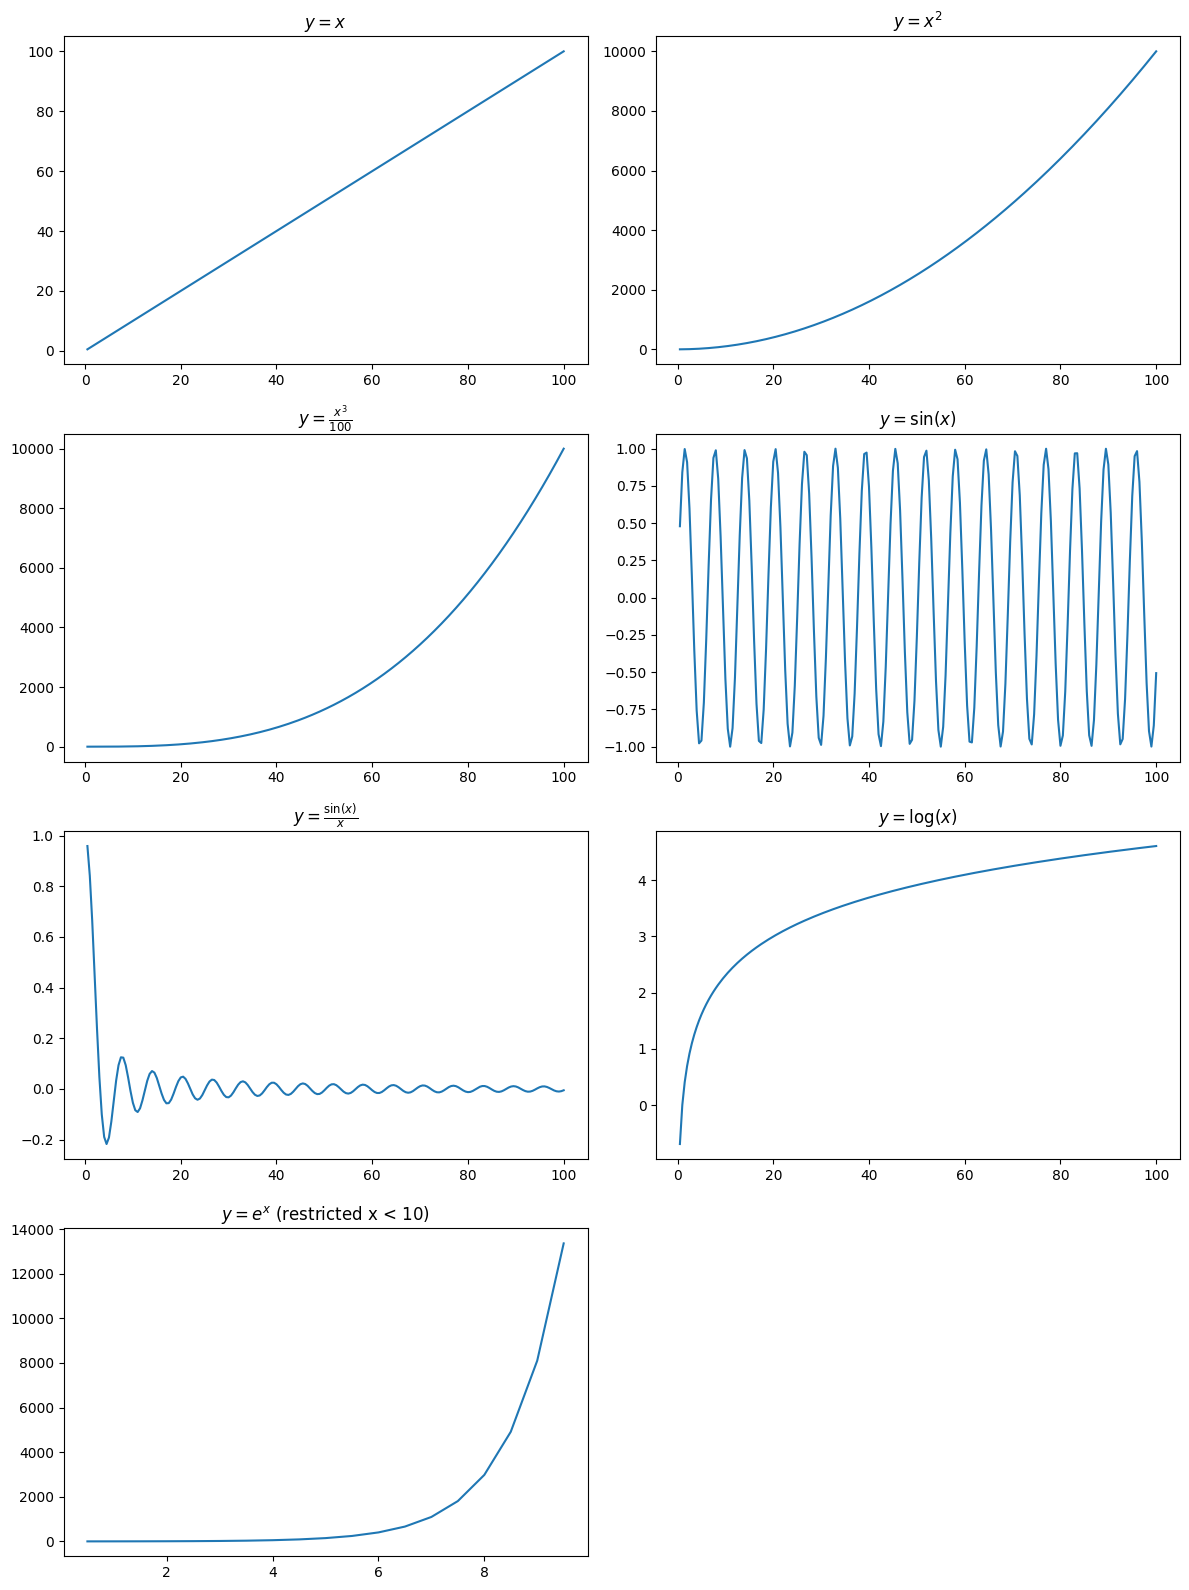

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Set up the plot (using subplots to avoid overflow from large values like exp(x))
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

# Plot each function
axs[0].plot(x, y1)
axs[0].set_title(r'$y = x$')

axs[1].plot(x, y2)
axs[1].set_title(r'$y = x^2$')

axs[2].plot(x, y3)
axs[2].set_title(r'$y = \frac{x^3}{100}$')

axs[3].plot(x, y4)
axs[3].set_title(r'$y = \sin(x)$')

axs[4].plot(x, y5)
axs[4].set_title(r'$y = \frac{\sin(x)}{x}$')

axs[5].plot(x, y6)
axs[5].set_title(r'$y = \log(x)$')


axs[6].plot(x[x < 10], y7[x < 10])  # restrict for visual clarity
axs[6].set_title(r'$y = e^x$ (restricted x < 10)')

# Hide the unused subplot
axs[7].axis('off')

# Layout adjustment
plt.tight_layout()
plt.show()


A10

In [15]:
import numpy as np
import pandas as pd


matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))


df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])


highest_std_col = df.std().idxmax()
highest_std_value = df.std().max()


lowest_mean_row_index = df.mean(axis=1).idxmin()
lowest_mean_value = df.mean(axis=1).min()


print("Column with highest standard deviation:", highest_std_col, "=", highest_std_value)
print("Row with lowest mean value:", lowest_mean_row_index, "=", lowest_mean_value)


Column with highest standard deviation: c = 0.33472098405764833
Row with lowest mean value: 13 = 1.1714118465040577


A11

In [16]:


df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")


lt8_count = (df["g"] == "LT8").sum()


std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

print("Number of rows with g == 'LT8':", lt8_count)
print("Std deviation of f where g == 'LT8':", std_lt8)
print("Std deviation of f where g == 'GT8':", std_gt8)

Number of rows with g == 'LT8': 17
Std deviation of f where g == 'LT8': 0.577418513677576
Std deviation of f where g == 'GT8': 0.31417730956696044


A12

In [ ]:
import numpy as np


A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

# in broadcasting array b is added to all rows of arrqy A
C = A + b

print("Matrix A:\n", A)
print("Vector b:\n", b)
print("Result of A + b (broadcasted):\n", C)


A13

In [17]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index


arr = np.array([4, 2, 9, -5, 0, 3])
print("Custom argmin index:", my_argmin(arr))
print("NumPy argmin index:", np.argmin(arr))


Custom argmin index: 3
NumPy argmin index: 3
